Linear Regression:
Mean Squared Error (MSE): 4782841856210144.0
Mean Absolute Error (MAE): 50049360.43362623


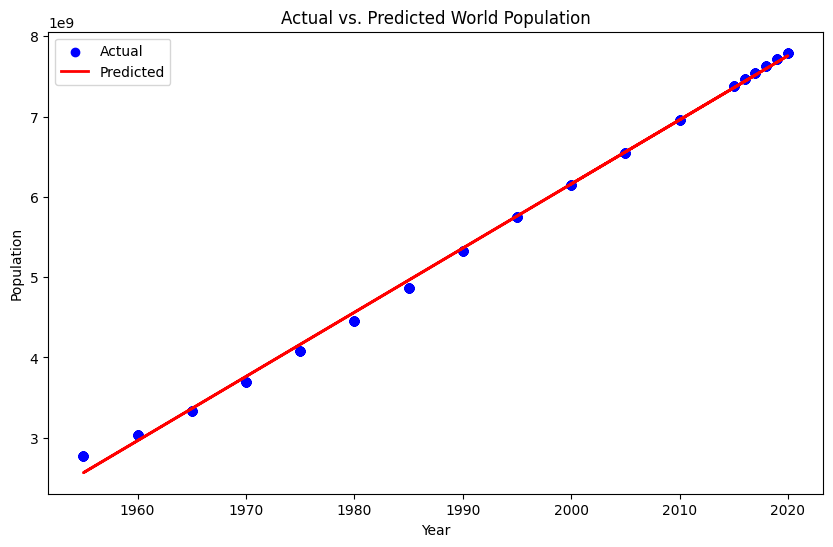


Bootstrapping for linear regression:


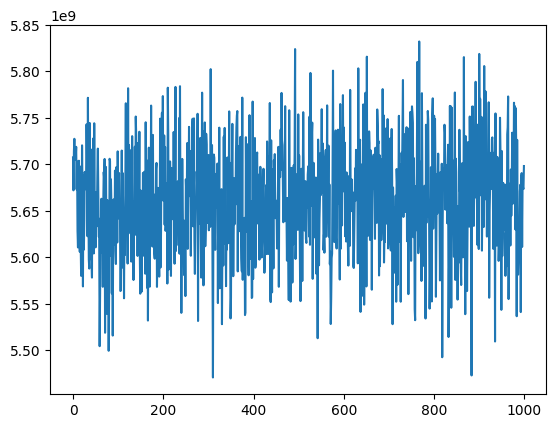

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv('/content/world-population.csv')

X = data[['Year']]
y = data['World Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression using library
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

#plotting graph between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs. Predicted World Population')
plt.legend()
plt.show()

#bootstrapping for linear regression
print()
print("Bootstrapping for linear regression:")
n_iterations = 1000
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =y_pred[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)


Support Vector Machine(SVM):
Mean Squared Error (MSE): 2.97118330087303e+18
Mean Absolute Error (MAE): 1515417134.7811904


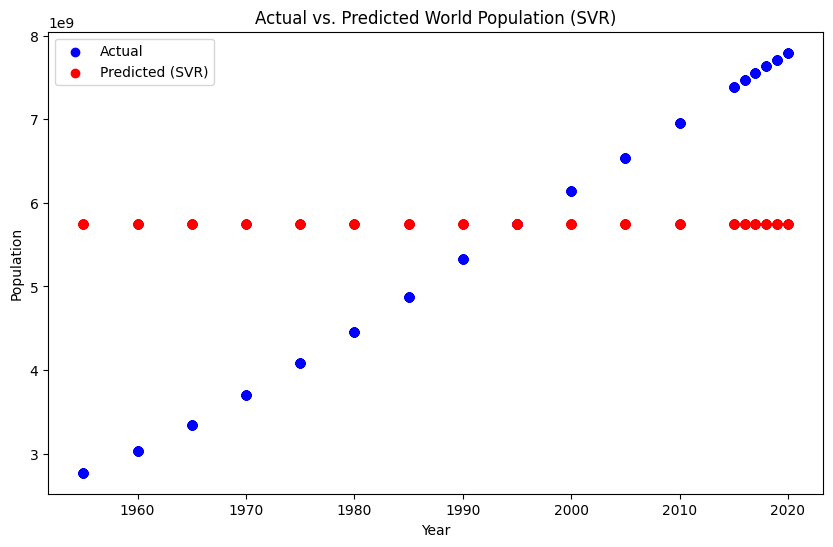


Bootstrapping for SVR:


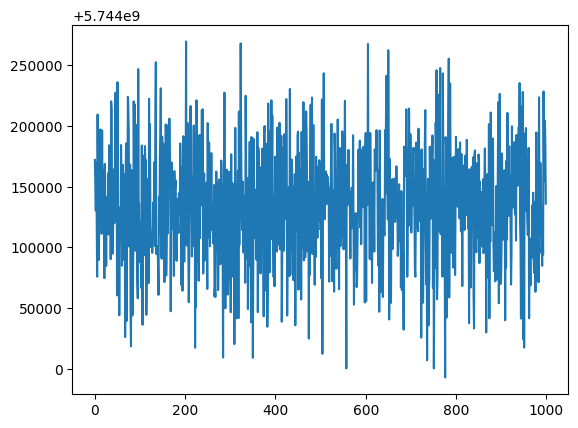

In [8]:
# Support Vector Machine for Regression (SVR) model
svr_reg = SVR(kernel='linear', C=1.0)
svr_reg.fit(X_train, y_train)

svr_y_pred = svr_reg.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)

print("Support Vector Machine(SVM):")
print(f"Mean Squared Error (MSE): {svr_mse}")
print(f"Mean Absolute Error (MAE): {svr_mae}")

#plotting graph between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, svr_y_pred, color='red', label='Predicted (SVR)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs. Predicted World Population (SVR)')
plt.legend()
plt.show()

#bootstrapping for SVR
print()
print("Bootstrapping for SVR:")
n_iterations = 1000
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =svr_y_pred[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

Linear Regression (Without Libraries):
Mean Squared Error (MSE): 4782841856210081.0
Mean Absolute Error (MAE): 50049360.433631495


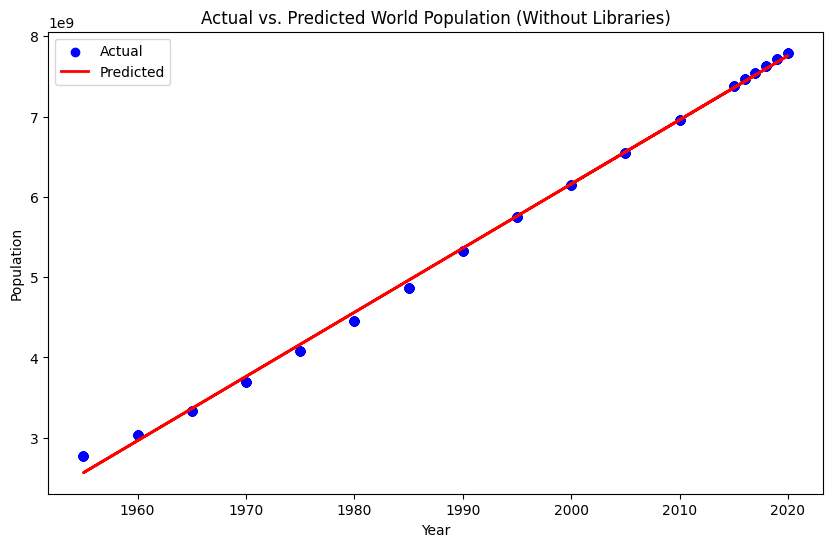


Bootstrapping for linear regression(manual):


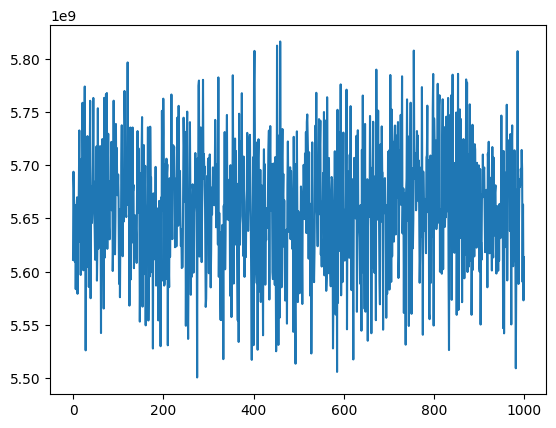

In [10]:
# Simple Linear Regression without using libraries
def simple_linear_regression(X, y):
    n = len(X)
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    numerator = 0
    denominator = 0

    for i in range(n):
        numerator += (X[i] - X_mean) * (y[i] - y_mean)
        denominator += (X[i] - X_mean) ** 2

    slope = numerator / denominator
    intercept = y_mean - slope * X_mean

    return slope, intercept

slope, intercept = simple_linear_regression(X_train.values, y_train.values)

slr_y_pred = intercept + slope * X_test.values

slr_mse = mean_squared_error(y_test, slr_y_pred)
slr_mae = mean_absolute_error(y_test, slr_y_pred)

print("Linear Regression (Without Libraries):")
print(f"Mean Squared Error (MSE): {slr_mse}")
print(f"Mean Absolute Error (MAE): {slr_mae}")

#plotting graph between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, slr_y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs. Predicted World Population (Without Libraries)')
plt.legend()
plt.show()

#bootstrapping for linear regression(manual)
print()
print("Bootstrapping for linear regression(manual):")
n_iterations = 1000
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =slr_y_pred[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)



Ridge Regression:
Mean Squared Error (MSE): 4782831815589449.0
Mean Absolute Error (MAE): 50049669.46066117


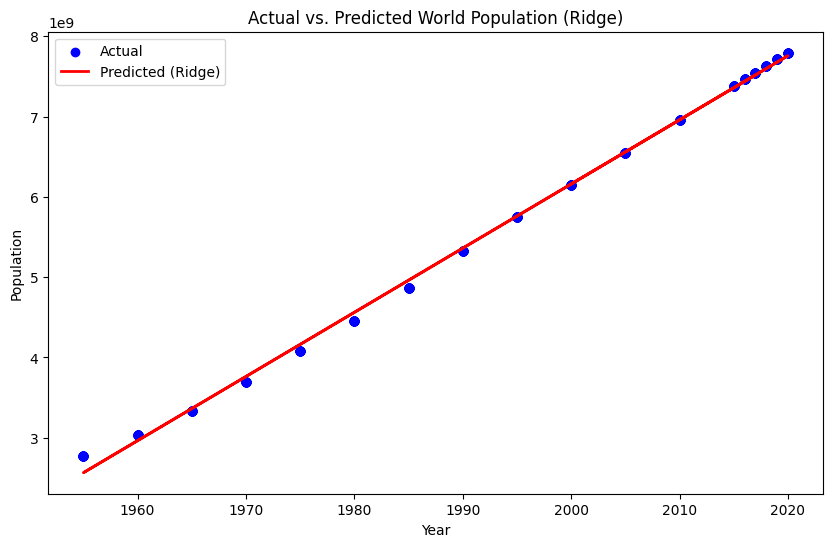


bootstrapping for Ridge regression:


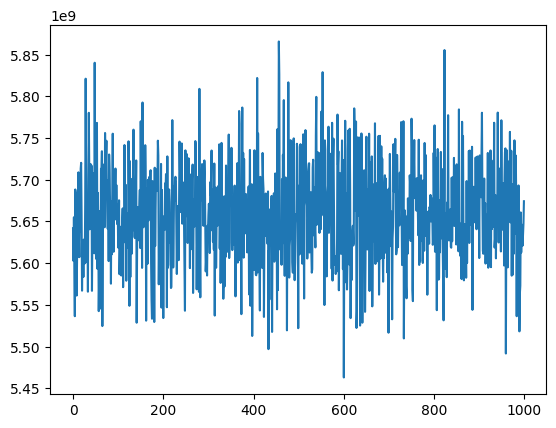

In [18]:
from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test set
ridge_y_pred = ridge_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)

print("\nRidge Regression:")
print(f"Mean Squared Error (MSE): {ridge_mse}")
print(f"Mean Absolute Error (MAE): {ridge_mae}")

# Create a scatter plot to visualize actual vs. predicted values for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, ridge_y_pred, color='red', linewidth=2, label='Predicted (Ridge)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs. Predicted World Population (Ridge)')
plt.legend()
plt.show()

#bootstrapping for ridge regression
print()
print("Bootstrapping for Ridge regression:")
n_iterations = 1000
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =ridge_y_pred[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)



Lasso Regression:
Mean Squared Error (MSE): 4782841855787680.0
Mean Absolute Error (MAE): 50049360.44660361


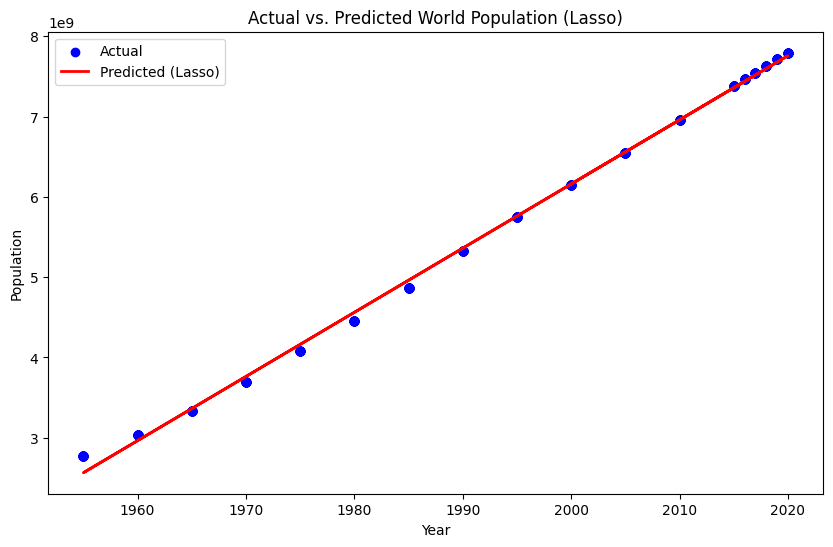


Bootstrapping for lasso regression:


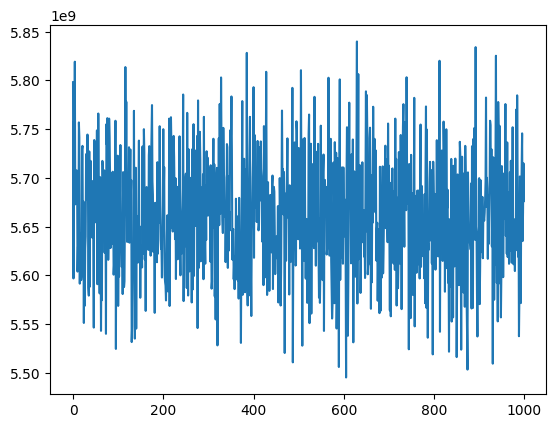

In [17]:
# Initialize Lasso Regression model
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)

# Fit the model to the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test set
lasso_y_pred = lasso_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)

print("\nLasso Regression:")
print(f"Mean Squared Error (MSE): {lasso_mse}")
print(f"Mean Absolute Error (MAE): {lasso_mae}")

# Create a scatter plot to visualize actual vs. predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, lasso_y_pred, color='red', linewidth=2, label='Predicted (Lasso)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs. Predicted World Population (Lasso)')
plt.legend()
plt.show()

#bootstrapping for lasso regression
print()
print("Bootstrapping for lasso regression:")
n_iterations = 1000
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =lasso_y_pred[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

K-Nearest Neighbors (KNN):
Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0


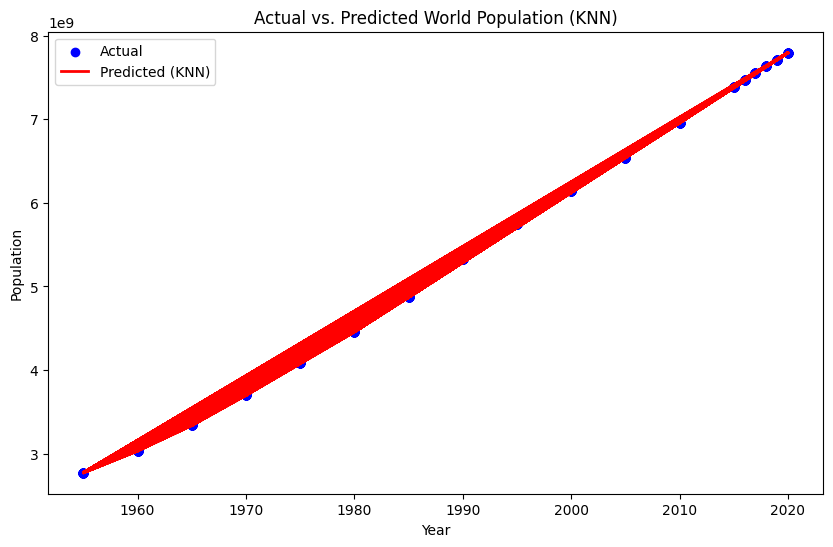


Bootstrapping for KNN:


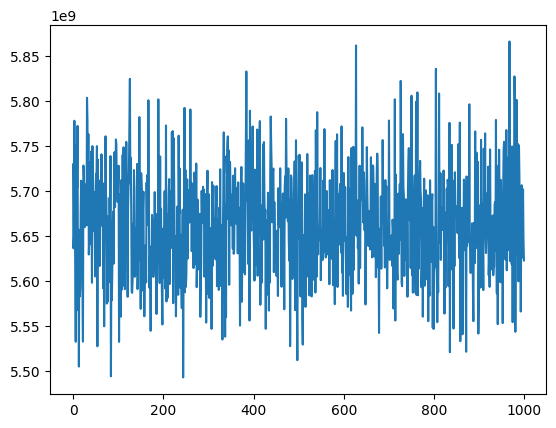

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN model with an arbitrary n_neighbors value
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can try different values

# Fit the model to the training data
knn_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("K-Nearest Neighbors (KNN):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Create a scatter plot to visualize actual vs. predicted values for KNN
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted (KNN)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs. Predicted World Population (KNN)')
plt.legend()
plt.show()

#bootstrapping for KNN
print()
print("Bootstrapping for KNN:")
n_iterations = 1000
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred =y_pred[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)
standard_error = np.std(bootstrap_predictions)
c=range(n_iterations )
plt.plot(c,bootstrap_predictions)

